[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/DeepLearning/blob/main/Semana03_Gym_Gymnasium.ipynb)

Esta clase aprenderemos a cargar algunos ambientes (enviroments) para entrenar agentes con las técnicas que veremos en las siguientes clases. Una vez que se entiende con que se interactúa, es mas fácil trabajar con ello.

## GYM:
https://www.gymlibrary.dev/index.html

# Gymnasium:
https://gymnasium.farama.org/

# Instalaciones

In [ ]:
!pip install swig

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 12.2 MB/s eta 0:00:00


In [ ]:
!pip install pygame

In [ ]:
!pip install gym[box2d]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 30.5 MB/s eta 0:00:00
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=2376102 sha256=fd19a046b9ccd4d60a0b3eb61a9e2c09e7f4d1e310f5f7d19c44b68584d4a70a
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py
  Attempting uninstall: pygame
    Found existing installation: pygame 2.6.0
    Uninstalling pygame-2.6.0:
      Successfully uninstalled pygame-2.6.0


In [ ]:
!pip show gym

Name: gym
Version: 0.25.2
Summary: Gym: A universal API for reinforcement learning environments
Home-page: https://www.gymlibrary.ml/
Author: Gym Community
Author-email: jkterry@umd.edu
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: cloudpickle, gym-notices, numpy
Required-by: dopamine_rl


# Como interactuaremos con el modelo:
<center>
<img src='https://gymnasium.farama.org/_images/AE_loop.png' width=500 lenght=500/>
</center>

In [ ]:
import numpy as np

In [ ]:
import gym
env = gym.make("LunarLander-v2")
observation = env.reset(seed=42)
for _ in range(1000):
   action = env.action_space.sample()  # User-defined policy function
   observation, reward, terminated, truncated= env.step(action)
   if terminated or truncated:
      observation = env.reset()
env.close()

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [ ]:
import os
os.environ['SDL_VIDEODRIVER']='dummy'
import pygame
pygame.display.set_mode((640,480))

<Surface(640x480x32 SW)>

In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


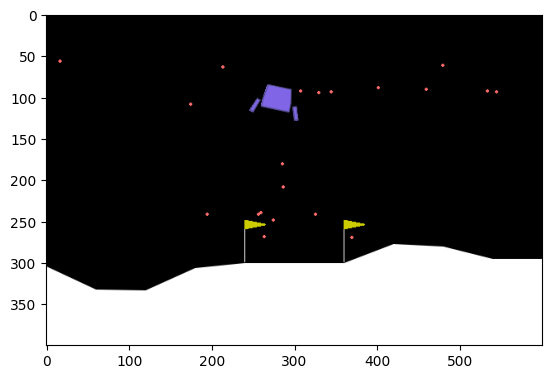

In [ ]:
plt.imshow(env.render(mode='rgb_array'))

In [ ]:
import imageio

In [ ]:
def create_video(filename, env, fps=30):
  video = imageio.get_writer(filename, fps=fps)
  done = False
  state = env.reset()
  frame = env.render(mode="rgb_array")
  video.append_data(frame)
  while not done:
    action = env.action_space.sample()
    state, _, done, _ = env.step(action)
    frame = env.render(mode="rgb_array")
    video.append_data(frame)
    for k in range(20):
      video.append_data(frame)

filename = "./taxi.mp4"

create_video(filename, env)

Todo esto fue el vistazo rápido de varias cosas que se pueden hacer.

# Detalles de lo visto anteriormente

In [ ]:
from gym.spaces import Box, Discrete, Dict, Tuple, MultiBinary, MultiDiscrete

observation_space = Box(low=-1.0, high=2.0, shape=(3,), dtype=np.float32)
print(f'Muestra en un Box: {observation_space.sample()}')


observation_space = Discrete(4)
print(f'Muestra en un Discrete: {observation_space.sample()}')


observation_space = Discrete(5, start=-2)
print(f'Muestra en un Discrete con inicio -2: {observation_space.sample()}')


observation_space = Dict({"position": Discrete(2), "velocity": Discrete(3)})
print(f'Muestra en un Diccionario: {observation_space.sample()}')


observation_space = Tuple((Discrete(2), Discrete(3)))
print(f'Muestra en una Tupla: {observation_space.sample()}')


observation_space = MultiBinary(5)
print(f'Muestra en un Multibinario: {observation_space.sample()}')


observation_space = MultiDiscrete([ 5, 2, 2 ])
print(f'Muestra en un Multidiscreto: {observation_space.sample()}')

Muestra en un Box: [ 0.76291585 -0.4625319   0.9546793 ]
Muestra en un Discrete: 2
Muestra en un Discrete con inicio -2: 0
Muestra en un Diccionario: OrderedDict([('position', 0), ('velocity', 1)])
Muestra en una Tupla: (0, 0)
Muestra en un Multibinario: [1 1 0 0 1]
Muestra en un Multidiscreto: [2 1 1]


In [ ]:
# En nuestro enviroment de aterrizaje lunar
env.observation_space

Box([-1.5       -1.5       -5.        -5.        -3.1415927 -5.
 -0.        -0.       ], [1.5       1.5       5.        5.        3.1415927 5.        1.
 1.       ], (8,), float32)

In [ ]:
env.observation_space.sample()

array([-1.3671579 ,  0.7059801 ,  1.8199755 ,  4.592494  ,  0.54103506,
        3.076538  ,  0.33027473,  0.3874858 ], dtype=float32)

Las posiciones en esta lista pertenecen a:

- Posición X: La coordenada horizontal del módulo lunar.
- Posición Y: La coordenada vertical del módulo lunar.
- Velocidad en X: La velocidad horizontal del módulo lunar.
- Velocidad en Y: La velocidad vertical del módulo lunar.
- Ángulo: El ángulo de orientación del módulo lunar.
- Velocidad Angular: La tasa de cambio del ángulo del módulo lunar.
- Contacto de la Pierna Izquierda: Un valor binario que indica si la pierna izquierda del módulo lunar está en contacto con el suelo (1 si está en contacto, 0 en caso contrario).
- Contacto de la Pierna Derecha: Un valor binario que indica si la pierna derecha del módulo lunar está en contacto con el suelo (1 si está en contacto, 0 en caso contrario).



# Acciones

In [ ]:
# Acciones en nuestro aterrizaje lunar
env.action_space

Discrete(4)

In [ ]:
env.action_space.sample()

2

Esta posibles acciones son
- No hacer nada
- Encender motor principal (hacia arriba)
- Encender motor izquierdo (empuja hacia la derecha)
- Encender motor derecho (empuja hacia la izquierda)

# ¿Como sabemos si nuestro agente terminó?

In [ ]:
action

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1

In [ ]:
observation, reward, terminated, truncated = env.step(action)

In [ ]:
observation, reward, terminated, truncated

(array([-2.8608322e-02, -4.2763270e-02, -1.5975535e-02, -1.8799777e-13,
         2.4176814e-04, -8.4625639e-13,  1.0000000e+00,  1.0000000e+00],
       dtype=float32),
 -100,
 True,
 {'TimeLimit.truncated': False})

# Ejercicio:

¿Que representan las 4 variables que obtenemos al interactuar con el entorno?

# Ejercicio:

Cargar alguno de los siguiente enviroments y revisar que hacen:

https://www.gymlibrary.dev/environments/classic_control/

https://www.gymlibrary.dev/environments/box2d/

https://www.gymlibrary.dev/environments/toy_text/

In [ ]:
# Espacio para ejercicio




#  Atari

In [ ]:
!pip install --upgrade gym==0.17.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.6 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.17.0-py3-none-any.whl size=1648673 sha256=2c5aad8dc0d93d83cb03426eb69262a8257bf74a94af93f3329cc8d05cf9c81c
  Stored in directory: /root/.cache/pip/wheels/2d/f2/76/f25acf56320307527b4befb1152551fb6801b925e8a3fd645a
Successfully built gym
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 2.2.1
    Uninstalling cloudpickle-2.2.1:
      Successfully uninstalled cloudpickle-2.2.1
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.11.1 requires cloudpickl

In [ ]:
!wget http://www.atarimania.com/roms/Atari-2600-VCS-ROM-Collection.zip

--2024-08-01 22:38:03--  http://www.atarimania.com/roms/Atari-2600-VCS-ROM-Collection.zip
Resolving www.atarimania.com (www.atarimania.com)... 212.83.163.6
Connecting to www.atarimania.com (www.atarimania.com)|212.83.163.6|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.atarimania.com/roms/Atari-2600-VCS-ROM-Collection.zip [following]
--2024-08-01 22:38:04--  https://www.atarimania.com/roms/Atari-2600-VCS-ROM-Collection.zip
Connecting to www.atarimania.com (www.atarimania.com)|212.83.163.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20633805 (20M) [application/x-zip-compressed]
Saving to: ‘Atari-2600-VCS-ROM-Collection.zip’

Atari-2600-VCS-ROM- 100%[===================>]  19.68M  4.80MB/s    in 4.1s    

2024-08-01 22:38:09 (4.80 MB/s) - ‘Atari-2600-VCS-ROM-Collection.zip’ saved [20633805/20633805]



In [ ]:
!unzip /content/Atari-2600-VCS-ROM-Collection.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: HC ROMS/BY ALPHABET (PAL)/A-G/REMAINING NTSC ORIGINALS/Bachelor Party.bin  
  inflating: HC ROMS/BY ALPHABET (PAL)/A-G/REMAINING NTSC ORIGINALS/Beany Bopper.bin  
  inflating: HC ROMS/BY ALPHABET (PAL)/A-G/REMAINING NTSC ORIGINALS/Bear Game Demo.bin  
  inflating: HC ROMS/BY ALPHABET (PAL)/A-G/REMAINING NTSC ORIGINALS/Berenstain Bears.bin  
  inflating: HC ROMS/BY ALPHABET (PAL)/A-G/REMAINING NTSC ORIGINALS/Bionic Breakthrough.bin  
  inflating: HC ROMS/BY ALPHABET (PAL)/A-G/REMAINING NTSC ORIGINALS/Birthday Mania.bin  
  inflating: HC ROMS/BY ALPHABET (PAL)/A-G/REMAINING NTSC ORIGINALS/Boggle (Prototype).bin  
  inflating: HC ROMS/BY ALPHABET (PAL)/A-G/REMAINING NTSC ORIGINALS/Bouncin' Baby Bunnies (Prototype).bin  
  inflating: HC ROMS/BY ALPHABET (PAL)/A-G/REMAINING NTSC ORIGINALS/Bugs Bunny (Prototype).bin  
  inflating: HC ROMS/BY ALPHABET (PAL)/A-G/REMAINING NTSC ORIGINALS/BurgerTime.bin  
  inflating: HC R

In [ ]:
!pip install atari_py

In [ ]:
!python -m atari_py.import_roms /content/ROMS

copying yars_revenge.bin from /content/ROMS/Yars' Revenge (Time Freeze) (1982) (Atari, Howard Scott Warshaw - Sears) (CX2655 - 49-75167) ~.bin to /usr/local/lib/python3.10/dist-packages/atari_py/atari_roms/yars_revenge.bin
copying trondead.bin from /content/ROMS/TRON - Deadly Discs (TRON Joystick) (1983) (M Network - INTV - APh Technological Consulting, Jeff Ronne, Brett Stutz) (MT5662) ~.bin to /usr/local/lib/python3.10/dist-packages/atari_py/atari_roms/trondead.bin
copying battle_zone.bin from /content/ROMS/Battlezone (1983) (Atari - GCC, Michael Feinstein, Patricia Goodson, Brad Rice) (CX2681) ~.bin to /usr/local/lib/python3.10/dist-packages/atari_py/atari_roms/battle_zone.bin
copying hero.bin from /content/ROMS/H.E.R.O. (1984) (Activision, John Van Ryzin) (AZ-036-04) ~.bin to /usr/local/lib/python3.10/dist-packages/atari_py/atari_roms/hero.bin
copying crazy_climber.bin from /content/ROMS/Crazy Climber (1983) (Atari - Roklan, Joe Gaucher, Alex Leavens) (CX2683) ~.bin to /usr/local/l

In [ ]:
!pip install "gymnasium[atari, accept-rom-license]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 6.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 50.7 MB/s eta 0:00:00
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446662 sha256=db007b7cd6e224e4d07826abb6a00a7c8ea7ba2b8a16dfffff3a22c2dea0cb2c
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license


In [ ]:
!pip install gym[accept-rom-license]

In [ ]:
%%capture
!apt-get update
!pip install pyglet==1.3.2
!pip install gym[atari] pyvirtualdisplay
!apt-get install -y xvfb python-opengl ffmpeg
!sudo apt-get install xvfb
!pip install xvfbwrapper
!pip install tensorflow==2.1.*
!pip install box2d-py
!pip install gast==0.2.2

In [ ]:
import gym
from gym import logger as gymlogger
from gym.wrappers import AtariPreprocessing, FrameStack
#from gym.wrappers.record_video import RecordVideo

import tensorflow as tf
import numpy as np
import random
import glob
import io
import time
import base64

from IPython.display import HTML
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display

display = Display(visible=0, size=(1400, 900))
display.start()

In [ ]:
# Cargar entorno y espacios de acciones y estados
env = gym.make('AdventureNoFrameskip-v4')
env = AtariPreprocessing(env,
                         grayscale_obs=False,
                         scale_obs=False,
                         terminal_on_life_loss=True)
env = FrameStack(env, num_stack=4)

num_state_feats = env.observation_space.shape
num_actions = env.action_space.n
max_observation_values = env.observation_space.high

print('Número de características de estados: {}'.format(num_state_feats))
print('Número de acciones posibles: {}'.format(num_actions))

Número de características de estados: (4, 84, 84, 3)
Número de acciones posibles: 18


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
env.reset()

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
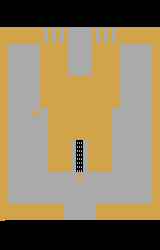

In [ ]:
env.render(mode='rgb_array')

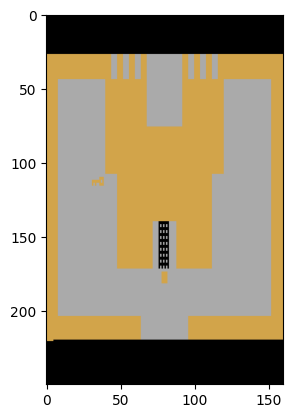

In [ ]:
plt.imshow(env.render(mode='rgb_array'))